In [4]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("../data/processed/features.csv")

# Drop non-numeric and non-informative columns
df = df.drop(columns=["date", "coin", "symbol"])

# Replace infinities and drop NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Split features and target
X = df.drop(columns=["price"])
y = df["price"]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42)
}

# Store evaluation results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    results[name] = {"MAE": mae, "RMSE": rmse}
    print(f"{name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Linear Regression → MAE: 123.13, RMSE: 303.88
Ridge Regression → MAE: 31.73, RMSE: 157.37
Lasso Regression → MAE: 24.45, RMSE: 128.26
Random Forest → MAE: 13.96, RMSE: 86.49
XGBoost → MAE: 4.60, RMSE: 31.27
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 797, number of used features: 9
[LightGBM] [Info] Start training from score 546.100037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\praba\AppData\Local\Temp\ipykernel_21752\3111298404.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_df, x="Model", y="MAE", palette="viridis")
C:\Users\praba\AppData\Local\Temp\ipykernel_21752\3111298404.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_df, x="Model", y="RMSE", palette="magma")


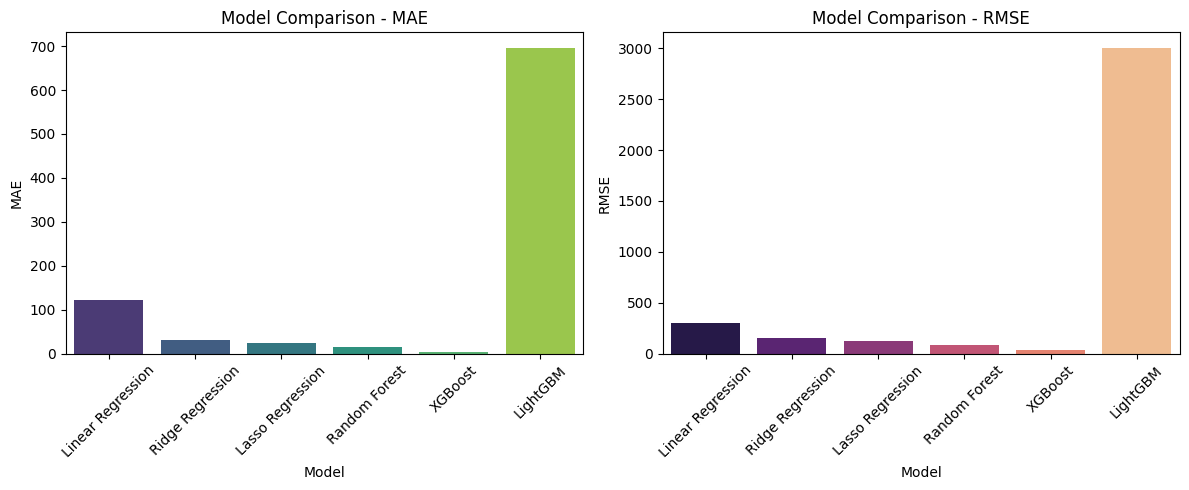

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame
score_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=score_df, x="Model", y="MAE", palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Comparison - MAE")

plt.subplot(1, 2, 2)
sns.barplot(data=score_df, x="Model", y="RMSE", palette="magma")
plt.xticks(rotation=45)
plt.title("Model Comparison - RMSE")

plt.tight_layout()
plt.show()


✅ Model Training